In [40]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
import joblib

import warnings
warnings.filterwarnings('ignore')

sns.set_theme(style="dark")

In [8]:
df = pd.read_csv('data/creditcard.csv')

In [9]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [10]:
df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [11]:
df.shape

(284807, 31)

In [6]:
#df['Time'] = pd.to_datetime(df['Time'])

In [7]:
# df.dtypes

In [12]:
df_class = df['Class'].value_counts(normalize=True)

In [13]:
df_class

0    0.998273
1    0.001727
Name: Class, dtype: float64

In [14]:
df_class.index

Int64Index([0, 1], dtype='int64')

In [17]:
# sns.barplot(df, x=df_class.index, y=df_class.values)


<AxesSubplot:xlabel='Class', ylabel='count'>

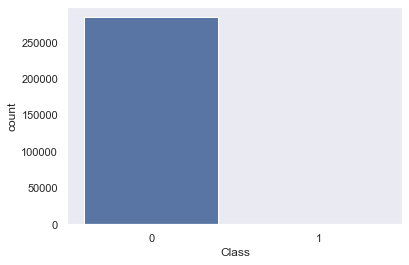

In [15]:
# imbalanced data
sns.countplot(data=df, x='Class')

In [19]:
df.isna().sum()


Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [20]:
df.duplicated().sum()

1081

In [21]:
df.drop_duplicates(inplace=True, ignore_index=True)

In [22]:
df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
283721,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
283722,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
283723,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
283724,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
283725,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [16]:
df.duplicated().sum()

1081

In [17]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [18]:
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_score, recall_score, roc_auc_score, roc_curve,classification_report
from sklearn.pipeline import Pipeline



In [19]:
X = df.drop(columns='Class', axis=1)
y = df[['Class']]

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.25, stratify=y)

In [21]:
knc = KNeighborsClassifier()

In [22]:
knc.fit(X_train, y_train)

KNeighborsClassifier()

In [23]:
y_pred = knc.predict(X_test.values)

In [24]:
knc.score(X_test.values, y_test)

0.9983146540827504

In [25]:
confusion_matrix(y_test, y_pred)

array([[71079,     0],
       [  120,     3]])

In [28]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71079
           1       1.00      0.02      0.05       123

    accuracy                           1.00     71202
   macro avg       1.00      0.51      0.52     71202
weighted avg       1.00      1.00      1.00     71202



In [26]:
y_pred_probs = knc.predict_proba(X_test.values)[:, 1]

In [27]:
y_pred_probs

array([0., 0., 0., ..., 0., 0., 0.])

In [29]:
y_pred_probs[0]

0.0

# The ROC curve

In [30]:
ftr, tpr, thresholds = roc_curve(y_test, y_pred_probs)

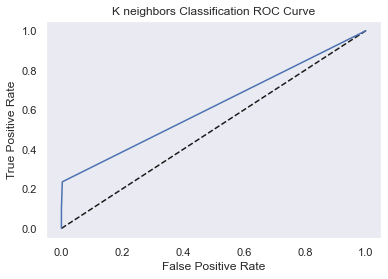

In [31]:
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(ftr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('K neighbors Classification ROC Curve')
plt.show()

In [32]:
roc_auc_score(y_test, y_pred_probs)

0.6165803491065764

# Logistic regression 

In [33]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test.values)

In [34]:
lr.score(X_test, y_test)

0.9990590151962023

In [35]:
y_pred_proba = lr.predict_proba(X_test)[:, 1]

In [36]:
y_pred_proba[0]

1.0056218994271165e-06

In [37]:
ftr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

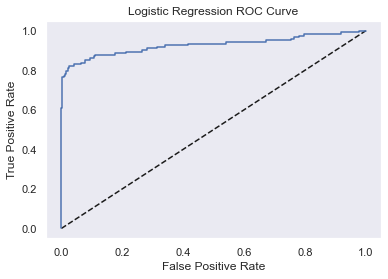

In [38]:
plt.plot([0,1], [0,1], 'k--')
plt.plot(ftr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve')
plt.show()

In [39]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71079
           1       0.75      0.69      0.72       123

    accuracy                           1.00     71202
   macro avg       0.87      0.85      0.86     71202
weighted avg       1.00      1.00      1.00     71202



# Save the model

In [47]:
joblib.dump(lr, 'linear_regression_model.joblib')

['linear_regression_model.joblib']

# Load model

In [48]:
linear_model = joblib.load('linear_regression_model.joblib')

# Unseen data

In [63]:
uploaded_df = df.sample(20).drop(columns='Class', axis=1).to_csv('unseen_data.csv', index=False)


In [ ]:
def fraud_detection(unseen_data, model):
    unseen_df = credict_card_df.sample(20).drop(columns='Class', axis=1).to_csv('unseen_data.csv', index=False)
    predicted_sample = linear_model.predict(unseen_df)
    unseen_df['predict_frud'] = predicted_sample
    return unseen_df



In [62]:
uploaded_df

In [50]:
df_sample = df.sample(1)

In [56]:
df_sample


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,predict_frud
264276,161347.0,-1.204433,0.19036,-0.081487,-4.368981,1.464883,3.619267,-1.011166,1.697827,1.887664,...,0.897624,-0.139893,0.727515,-0.124393,-0.358299,0.428249,0.216592,9.99,0,0


In [51]:
df_sample_X = df_sample.drop(columns='Class', axis=1)

In [54]:
predicted_sample = linear_model.predict(df_sample_X)

In [55]:
df_sample['predict_frud'] = predicted_sample


# Hyper Tuning Parameters

In [194]:
# kf = KFold(n_splits=5, shuffle=True, random_state=42)

# ridge = Ridge()
# param_grid = {'alpha': [0.001, 1, 1000],
#              'solver': ['auto', 'sag', 'lsqr']}
# ridge_cv = GridSearchCV(ridge, param_grid= param_grid, cv=kf, n_jobs=1)
# ridge_cv.fit(X_train, y_train)
# ridge_cv.best_params_



{'alpha': 1000, 'solver': 'auto'}

In [196]:
# ridge_cv.best_score_

0.5167534408789631

In [ ]:
# random_ridge_cv = RandomizedSearchCV(ridge, param_grid, cv=kf, n_jobs=1)
# random_ridge_cv.fit(X_train, y_train)
# random_ridge_cv.best_params_

In [ ]:
# test_score = random_ridge_cv(X_test, y_test) 